In [33]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, TimeDistributed, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#Set parameters to see all data
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

In [2]:
# Define files
files = ['neg_sequences.npy', 'pos_sequences.npy']
data_list = []


# Load multiple .npy files
for file in files:
  # Load the .npy file using a context manager
  with open(file, 'rb') as f:
      data = np.load(f)
      data_list.append(data)

# Display the data
for data in data_list:
    print(data)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ...

In [3]:

# Load data
pos_sequences = np.load('pos_sequences.npy')
neg_sequences = np.load('neg_sequences.npy')

In [4]:
pos_labels = np.ones(len(pos_sequences))
neg_labels = np.zeros(len(neg_sequences))


In [5]:
# Özelliklerin birleştirilmesi
X = np.concatenate([pos_sequences, neg_sequences])

# Etiketlerin birleştirilmesi
y = np.concatenate([pos_labels, neg_labels])


In [6]:

# Veri setini eğitim ve test setlerine böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


In [7]:
%%time

# Modelinizi tanımlayın
model = Sequential([
    LSTM(50, input_shape=(10, 312), return_sequences=True),
    LSTM(50),
    Dense(1, activation='sigmoid')
])

# Modeli derleyin
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Modeli eğitin
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
2800/2800 [==============================] - 111s 38ms/step - loss: 0.2478 - accuracy: 0.9050 - val_loss: 0.2293 - val_accuracy: 0.9078
Epoch 2/10
2800/2800 [==============================] - 82s 29ms/step - loss: 0.2217 - accuracy: 0.9126 - val_loss: 0.2289 - val_accuracy: 0.9078
Epoch 3/10
2800/2800 [==============================] - 73s 26ms/step - loss: 0.2175 - accuracy: 0.9142 - val_loss: 0.2266 - val_accuracy: 0.9090
Epoch 4/10
2800/2800 [==============================] - 69s 25ms/step - loss: 0.2142 - accuracy: 0.9151 - val_loss: 0.2238 - val_accuracy: 0.9111
Epoch 5/10
2800/2800 [==============================] - 71s 26ms/step - loss: 0.2114 - accuracy: 0.9168 - val_loss: 0.2244 - val_accuracy: 0.9105
Epoch 6/10
2800/2800 [==============================] - 71s 25ms/step - loss: 0.2085 - accuracy: 0.9169 - val_loss: 0.2252 - val_accuracy: 0.9111
Epoch 7/10
2800/2800 [==============================] - 70s 25ms/step - loss: 0.2051 - accuracy: 0.9190 - val_loss: 0.2272 

In [8]:
# Test seti üzerinde tahmin yapma
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype('int32')  # Eğer çıktı 0.5'ten büyükse 1, değilse 0 olarak sınıflandır


700/700 [==============================] - 7s 9ms/step


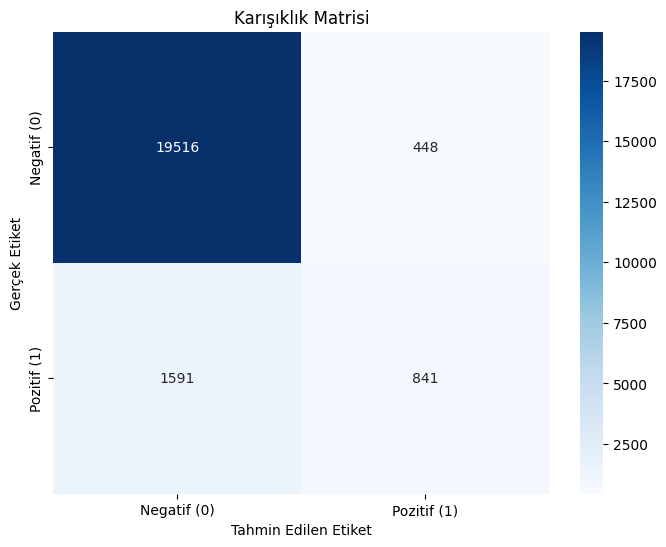

Doğruluk Oranı: 90.90%
Sınıflandırma Raporu:
               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     19964
         1.0       0.65      0.35      0.45      2432

    accuracy                           0.91     22396
   macro avg       0.79      0.66      0.70     22396
weighted avg       0.90      0.91      0.90     22396



In [9]:

# Karışıklık matrisini hesaplayın
conf_matrix = confusion_matrix(y_test, y_pred)

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif (0)', 'Pozitif (1)'], yticklabels=['Negatif (0)', 'Pozitif (1)'])
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Karışıklık Matrisi')
plt.show()

# Diğer performans metriklerini yazdırma
print("Doğruluk Oranı: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))


In [10]:
y_test[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [11]:
y_pred[:10]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

In [12]:
%%time

# Modelinizi tanımlayın
model2 = Sequential([
    LSTM(100, input_shape=(10, 312), return_sequences=True, dropout=0.2, recurrent_dropout=0.2),
    LSTM(100, return_sequences=True, dropout=0.2, recurrent_dropout=0.2),
    LSTM(50, return_sequences=True, dropout=0.2, recurrent_dropout=0.2),
    LSTM(50, return_sequences=True, dropout=0.2, recurrent_dropout=0.2),
    #LSTM(50, return_sequences=True, dropout=0.2, recurrent_dropout=0.2),
    #LSTM(50, return_sequences=True, dropout=0.2, recurrent_dropout=0.2),
    #LSTM(50, return_sequences=True, dropout=0.2, recurrent_dropout=0.2),
    #LSTM(50, return_sequences=True, dropout=0.2, recurrent_dropout=0.2),
    #LSTM(50, return_sequences=True, dropout=0.2, recurrent_dropout=0.2),
    LSTM(50, dropout=0.2, recurrent_dropout=0.2),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Modeli derleyin
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Modeli eğitin
model2.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
2800/2800 [==============================] - 397s 134ms/step - loss: 0.2811 - accuracy: 0.8974 - val_loss: 0.2401 - val_accuracy: 0.9039
Epoch 2/10
2800/2800 [==============================] - 370s 132ms/step - loss: 0.2383 - accuracy: 0.9064 - val_loss: 0.2294 - val_accuracy: 0.9085
Epoch 3/10
2800/2800 [==============================] - 360s 128ms/step - loss: 0.2318 - accuracy: 0.9093 - val_loss: 0.2279 - val_accuracy: 0.9093
Epoch 4/10
2800/2800 [==============================] - 370s 132ms/step - loss: 0.2268 - accuracy: 0.9105 - val_loss: 0.2261 - val_accuracy: 0.9102
Epoch 5/10
2800/2800 [==============================] - 345s 123ms/step - loss: 0.2245 - accuracy: 0.9127 - val_loss: 0.2254 - val_accuracy: 0.9110
Epoch 6/10
2800/2800 [==============================] - 330s 118ms/step - loss: 0.2220 - accuracy: 0.9133 - val_loss: 0.2248 - val_accuracy: 0.9102
Epoch 7/10
2800/2800 [==============================] - 328s 117ms/step - loss: 0.2199 - accuracy: 0.9130 - val_

In [13]:
# Test seti üzerinde tahmin yapma
y_pred_probs2 = model2.predict(X_test)
y_pred2 = (y_pred_probs2 > 0.5).astype('int32')  # Eğer çıktı 0.5'ten büyükse 1, değilse 0 olarak sınıflandır


700/700 [==============================] - 14s 18ms/step


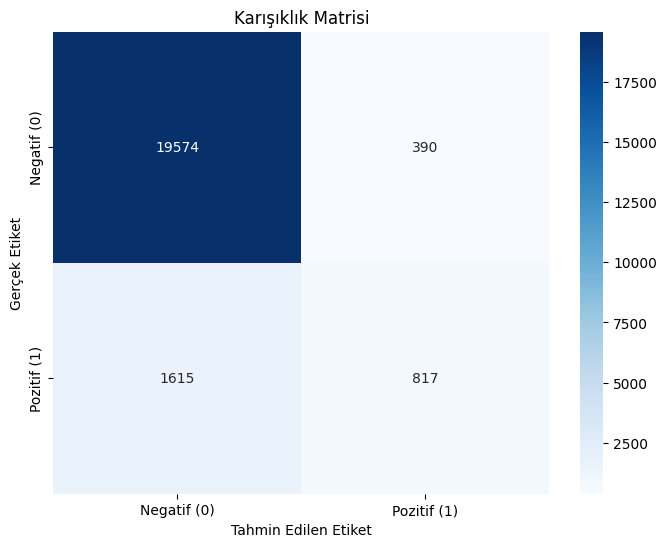

Doğruluk Oranı: 91.05%
Sınıflandırma Raporu:
               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     19964
         1.0       0.68      0.34      0.45      2432

    accuracy                           0.91     22396
   macro avg       0.80      0.66      0.70     22396
weighted avg       0.90      0.91      0.90     22396



In [14]:
# Karışıklık matrisini hesaplayın
conf_matrix2 = confusion_matrix(y_test, y_pred2)

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif (0)', 'Pozitif (1)'], yticklabels=['Negatif (0)', 'Pozitif (1)'])
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Karışıklık Matrisi')
plt.show()

# Diğer performans metriklerini yazdırma
print("Doğruluk Oranı: {:.2f}%".format(accuracy_score(y_test, y_pred2) * 100))
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred2))


In [15]:
y_test.astype(int)

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
result_df = pd.DataFrame()
result_df['actual'] = y_test.astype(int)
result_df['ltsm_three_layer'] = y_pred
result_df['ltsm_three_layer_probs'] = y_pred_probs
result_df['ltsm_multi_layer'] = y_pred2
result_df['ltsm_multi_layer_probs'] = y_pred_probs2

result_df.head()

,actual,ltsm_three_layer,ltsm_three_layer_probs,ltsm_multi_layer,ltsm_multi_layer_probs
0,0,0,0.003950,0,0.003967
1,0,0,0.366548,0,0.263913
2,0,0,0.003732,0,0.002746
3,0,0,0.019801,0,0.066035
4,0,0,0.199231,0,0.134995


In [17]:
result_df[result_df['actual'] == 1].head()

,actual,ltsm_three_layer,ltsm_three_layer_probs,ltsm_multi_layer,ltsm_multi_layer_probs
9,1,0,0.027396,0,0.024928
32,1,0,0.092688,0,0.169949
46,1,0,0.301033,0,0.380560
47,1,0,0.465605,1,0.769401
60,1,0,0.061902,0,0.170743


In [18]:
result_df.columns

Index(['actual', 'ltsm_three_layer', 'ltsm_three_layer_probs',
       'ltsm_multi_layer', 'ltsm_multi_layer_probs'],
      dtype='object')

In [20]:
# Eşik değerler
thresholds = [0.5, 0.7, 0.9]

# Eşik değerleri uygulayarak başarı karşılaştırması
for threshold in thresholds:
    result_df[f'predicted_{threshold}'] = result_df['ltsm_three_layer_probs'].apply(lambda x: 1 if x > threshold else 0)
    accuracy = accuracy_score(result_df['actual'], result_df[f'predicted_{threshold}'])
    print(f"Threshold: {threshold}, Accuracy: {accuracy:.2f}")

# Sonuçları gösterme
result_df.head()

Threshold: 0.5, Accuracy: 0.91
Threshold: 0.7, Accuracy: 0.91
Threshold: 0.9, Accuracy: 0.90


,actual,ltsm_three_layer,ltsm_three_layer_probs,ltsm_multi_layer,ltsm_multi_layer_probs,predicted_0.5,predicted_0.7,predicted_0.9
0,0,0,0.003950,0,0.003967,0,0,0
1,0,0,0.366548,0,0.263913,0,0,0
2,0,0,0.003732,0,0.002746,0,0,0
3,0,0,0.019801,0,0.066035,0,0,0
4,0,0,0.199231,0,0.134995,0,0,0


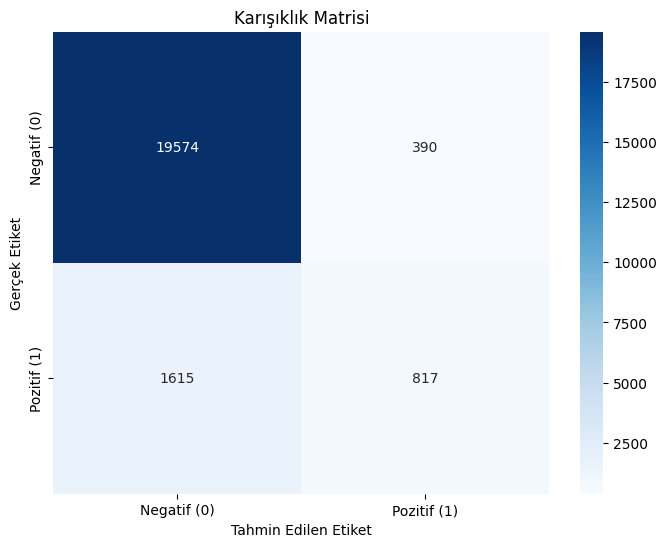

Doğruluk Oranı: 90.90%
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     19964
           1       0.65      0.35      0.45      2432

    accuracy                           0.91     22396
   macro avg       0.79      0.66      0.70     22396
weighted avg       0.90      0.91      0.90     22396



In [21]:
# Karışıklık matrisini hesaplayın
conf_matrix05 = confusion_matrix(result_df['actual'], result_df['predicted_0.5'])

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif (0)', 'Pozitif (1)'], yticklabels=['Negatif (0)', 'Pozitif (1)'])
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Karışıklık Matrisi')
plt.show()

# Diğer performans metriklerini yazdırma
print("Doğruluk Oranı: {:.2f}%".format(accuracy_score(result_df['actual'], result_df['predicted_0.5']) * 100))
print("Sınıflandırma Raporu:\n", classification_report(result_df['actual'], result_df['predicted_0.5']))


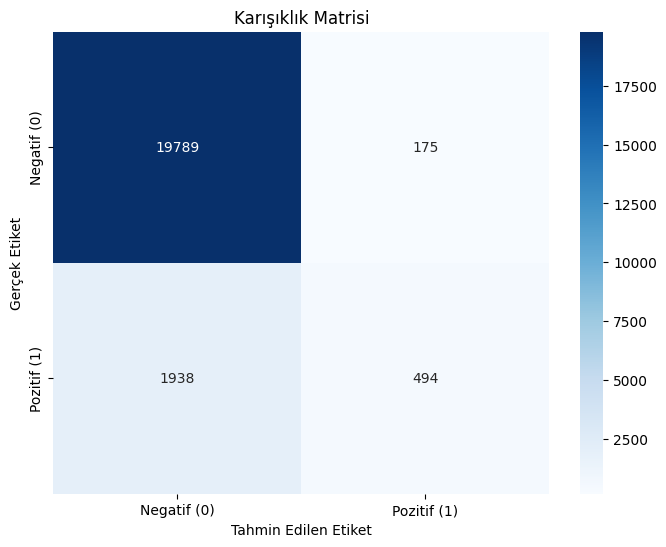

Doğruluk Oranı: 90.57%
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     19964
           1       0.74      0.20      0.32      2432

    accuracy                           0.91     22396
   macro avg       0.82      0.60      0.63     22396
weighted avg       0.89      0.91      0.88     22396



In [23]:
# Karışıklık matrisini hesaplayın
conf_matrix07 = confusion_matrix(result_df['actual'], result_df['predicted_0.7'])

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix07, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif (0)', 'Pozitif (1)'], yticklabels=['Negatif (0)', 'Pozitif (1)'])
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Karışıklık Matrisi')
plt.show()

# Diğer performans metriklerini yazdırma
print("Doğruluk Oranı: {:.2f}%".format(accuracy_score(result_df['actual'], result_df['predicted_0.7']) * 100))
print("Sınıflandırma Raporu:\n", classification_report(result_df['actual'], result_df['predicted_0.7']))


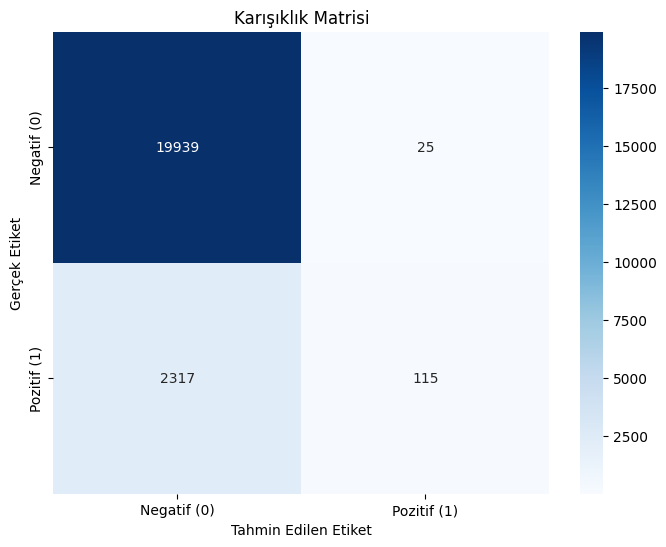

Doğruluk Oranı: 89.54%
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.90      1.00      0.94     19964
           1       0.82      0.05      0.09      2432

    accuracy                           0.90     22396
   macro avg       0.86      0.52      0.52     22396
weighted avg       0.89      0.90      0.85     22396



In [24]:
# Karışıklık matrisini hesaplayın
conf_matrix09 = confusion_matrix(result_df['actual'], result_df['predicted_0.9'])

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix09, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif (0)', 'Pozitif (1)'], yticklabels=['Negatif (0)', 'Pozitif (1)'])
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Karışıklık Matrisi')
plt.show()

# Diğer performans metriklerini yazdırma
print("Doğruluk Oranı: {:.2f}%".format(accuracy_score(result_df['actual'], result_df['predicted_0.9']) * 100))
print("Sınıflandırma Raporu:\n", classification_report(result_df['actual'], result_df['predicted_0.9']))


In [29]:
result_df[result_df['actual'] == 1].shape

(2432, 8)

In [31]:
print(result_df[(result_df['actual'] == 1) & (result_df['predicted_0.5'] == 1)].shape)
print(result_df[(result_df['actual'] == 1) & (result_df['predicted_0.7'] == 1)].shape)
print(result_df[(result_df['actual'] == 1) & (result_df['predicted_0.9'] == 1)].shape)


(841, 8)
(494, 8)
(115, 8)


##Resnet

Epoch 1/10
2800/2800 [==============================] - 72s 23ms/step - loss: 0.2541 - accuracy: 0.9031 - val_loss: 0.2342 - val_accuracy: 0.9051
Epoch 2/10
2800/2800 [==============================] - 64s 23ms/step - loss: 0.2216 - accuracy: 0.9131 - val_loss: 0.2305 - val_accuracy: 0.9080
Epoch 3/10
2800/2800 [==============================] - 65s 23ms/step - loss: 0.2132 - accuracy: 0.9161 - val_loss: 0.2308 - val_accuracy: 0.9100
Epoch 4/10
2800/2800 [==============================] - 74s 27ms/step - loss: 0.2037 - accuracy: 0.9193 - val_loss: 0.2332 - val_accuracy: 0.9091
Epoch 5/10
2800/2800 [==============================] - 71s 25ms/step - loss: 0.1943 - accuracy: 0.9231 - val_loss: 0.2397 - val_accuracy: 0.9048
Epoch 6/10
2800/2800 [==============================] - 64s 23ms/step - loss: 0.1827 - accuracy: 0.9281 - val_loss: 0.2481 - val_accuracy: 0.9036
Epoch 7/10
2800/2800 [==============================] - 67s 24ms/step - loss: 0.1710 - accuracy: 0.9336 - val_loss: 0.2641 -

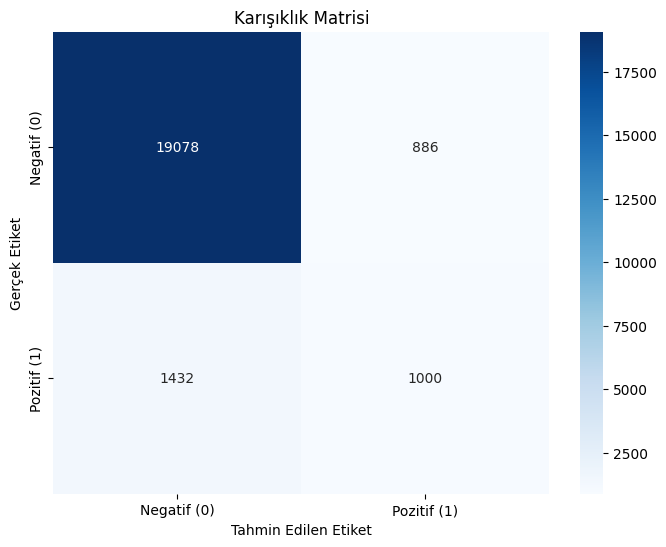

Doğruluk Oranı: 90.90%
Sınıflandırma Raporu:
               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     19964
         1.0       0.65      0.35      0.45      2432

    accuracy                           0.91     22396
   macro avg       0.79      0.66      0.70     22396
weighted avg       0.90      0.91      0.90     22396



In [34]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv1D, Add, Activation, BatchNormalization


# ResNet block definition
def resnet_block(input_tensor, filters, kernel_size=3, stride=1):
    x = Conv1D(filters, kernel_size, strides=stride, padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv1D(filters, kernel_size, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)

    x = Add()([x, input_tensor])
    x = Activation('relu')(x)
    return x

# Modelinizi tanımlayın
input_shape = (10, 312)
inputs = Input(shape=input_shape)
x = Conv1D(64, 3, padding='same', activation='relu')(inputs)
x = BatchNormalization()(x)

# Add ResNet blocks
for _ in range(4):
    x = resnet_block(x, 64)

x = Flatten()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs, x)

# Modeli derleyin
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Modeli eğitin
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Test seti üzerinde tahmin yapma
y_pred_probs_resnet = model.predict(X_test)
y_pred_resnet = (y_pred_probs_resnet > 0.5).astype('int32')  # Eğer çıktı 0.5'ten büyükse 1, değilse 0 olarak sınıflandır

# Karışıklık matrisini hesaplayın
conf_matrix = confusion_matrix(y_test, y_pred_resnet)

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif (0)', 'Pozitif (1)'], yticklabels=['Negatif (0)', 'Pozitif (1)'])
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Karışıklık Matrisi')
plt.show()

# Diğer performans metriklerini yazdırma
print("Doğruluk Oranı: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

# Sonuçları kaydetme
#result_df = pd.DataFrame({'actual': y_test, 'predicted': y_pred.flatten()})
result_df['resnet_prob'] = y_pred_probs_resnet.flatten()

result_df.to_csv('results.csv', index=False)


In [35]:
result_df.head()

,actual,ltsm_three_layer,ltsm_three_layer_probs,ltsm_multi_layer,ltsm_multi_layer_probs,predicted_0.5,predicted_0.7,predicted_0.9,resnet_prob
0,0,0,0.003950,0,0.003967,0,0,0,0.001183
1,0,0,0.366548,0,0.263913,0,0,0,0.228769
2,0,0,0.003732,0,0.002746,0,0,0,0.000212
3,0,0,0.019801,0,0.066035,0,0,0,0.056665
4,0,0,0.199231,0,0.134995,0,0,0,0.134479


In [37]:
print(result_df[(result_df['actual'] == 1) & (result_df['resnet_prob'] > 0.5)].shape)
print(result_df[(result_df['actual'] == 1) & (result_df['resnet_prob'] > 0.7)].shape)
print(result_df[(result_df['actual'] == 1) & (result_df['resnet_prob'] > 0.9)].shape)



(1000, 9)
(743, 9)
(408, 9)


In [39]:
result_df.columns

Index(['actual', 'ltsm_three_layer', 'ltsm_three_layer_probs',
       'ltsm_multi_layer', 'ltsm_multi_layer_probs', 'predicted_0.5',
       'predicted_0.7', 'predicted_0.9', 'resnet_prob'],
      dtype='object')

In [40]:
# Eşik değerler
thresholds = [0.5, 0.7, 0.9]

# Eşik değerleri uygulayarak başarı karşılaştırması
for threshold in thresholds:
    result_df[f'resnet_predicted_{threshold}'] = result_df['resnet_prob'].apply(lambda x: 1 if x > threshold else 0)
    accuracy = accuracy_score(result_df['actual'], result_df[f'resnet_predicted_{threshold}'])
    print(f"Threshold: {threshold}, Accuracy: {accuracy:.2f}")

# Sonuçları gösterme
result_df.head()

Threshold: 0.5, Accuracy: 0.90
Threshold: 0.7, Accuracy: 0.90
Threshold: 0.9, Accuracy: 0.90


,actual,ltsm_three_layer,ltsm_three_layer_probs,ltsm_multi_layer,ltsm_multi_layer_probs,predicted_0.5,predicted_0.7,predicted_0.9,resnet_prob,resnet_predicted_0.5,resnet_predicted_0.7,resnet_predicted_0.9
0,0,0,0.003950,0,0.003967,0,0,0,0.001183,0,0,0
1,0,0,0.366548,0,0.263913,0,0,0,0.228769,0,0,0
2,0,0,0.003732,0,0.002746,0,0,0,0.000212,0,0,0
3,0,0,0.019801,0,0.066035,0,0,0,0.056665,0,0,0
4,0,0,0.199231,0,0.134995,0,0,0,0.134479,0,0,0


In [41]:
!pip install dgl

  Using cached dgl-2.1.0-cp310-cp310-manylinux1_x86_64.whl (8.5 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 11.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.w

In [42]:
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.0 MB/s eta 0:00:00
  Created wheel for torch-scatter: filename=torch_scatter-2.1.2-cp310-cp310-linux_x86_64.whl size=507268 sha256=192f264a81a9a73b16e68ef67a7d44accca1eab131890809ea23d28d96cf531b
  Stored in directory: /root/.cache/pip/wheels/92/f1/2b/3b46d54b134259f58c8363568569053248040859b1a145b3ce
  Created wheel for torch-sparse: filename=torch_sparse-0.6.18-cp310-cp310-linux_x86_64.whl size=1092566 sha256=1c30ed260e48eb73048d18cb624d5a83fdfd27b4c08c083dbfe0d18ff026353d
  Stored in directory: /root/.cache/pip/wheels/c9/d

In [1]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader

ModuleNotFoundError: No module named 'torch_geometric'

Epoch 1/10, Loss: 0.6898373961448669
Epoch 2/10, Loss: 0.5252740383148193
Epoch 3/10, Loss: 0.37696340680122375
Epoch 4/10, Loss: 0.32655447721481323
Epoch 5/10, Loss: 0.35453441739082336
Epoch 6/10, Loss: 0.3587651252746582
Epoch 7/10, Loss: 0.3333645462989807
Epoch 8/10, Loss: 0.3012111186981201
Epoch 9/10, Loss: 0.2784254252910614
Epoch 10/10, Loss: 0.2699420750141144


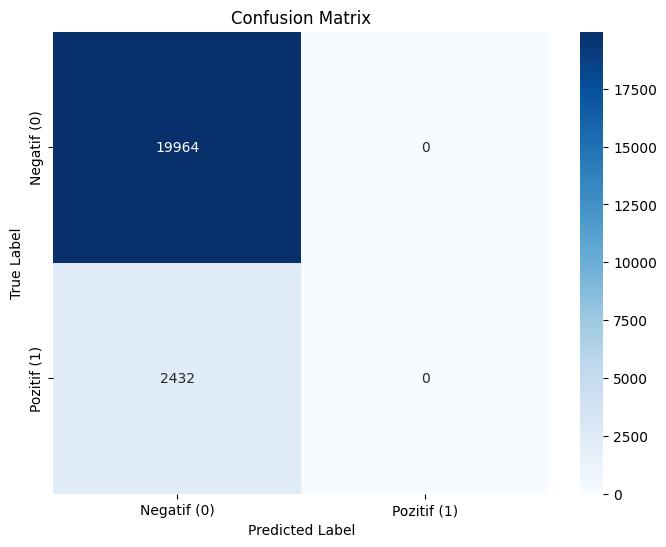

Accuracy: 89.14%
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     19964
           1       0.00      0.00      0.00      2432

    accuracy                           0.89     22396
   macro avg       0.45      0.50      0.47     22396
weighted avg       0.79      0.89      0.84     22396



In [45]:

# Concatenate features and labels
X = np.concatenate([pos_sequences, neg_sequences])
X = X.reshape((X.shape[0], -1))  # Flatten the sequences if necessary
y = np.concatenate([pos_labels, neg_labels])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Create graphs
def build_graph(X, y):
    edge_index = torch.tensor([[], []], dtype=torch.long)  # No edges in this example
    x = torch.tensor(X, dtype=torch.float)
    y = torch.tensor(y, dtype=torch.long)
    data = Data(x=x, edge_index=edge_index, y=y)
    return data

train_data = build_graph(X_train, y_train)
test_data = build_graph(X_test, y_test)

# Create DataLoader
train_loader = DataLoader([train_data], batch_size=32, shuffle=True)
test_loader = DataLoader([test_data], batch_size=32, shuffle=False)

# Define GCN model
class GCNModel(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCNModel, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)
        return F.log_softmax(x, dim=1)

# Create model
in_channels = X_train.shape[1]
hidden_channels = 50
out_channels = 2
model = GCNModel(in_channels, hidden_channels, out_channels)

# Prepare model for training
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = torch.nn.CrossEntropyLoss()

# Train model
n_epochs = 10
for epoch in range(n_epochs):
    model.train()
    for data in train_loader:
        optimizer.zero_grad()
        out = model(data)
        loss = loss_fn(out, data.y)
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {loss.item()}")

# Make predictions on test set
model.eval()
y_gnn_pred_probs = []
y_true = []

with torch.no_grad():
    for data in test_loader:
        out = model(data)
        y_gnn_pred_probs.append(torch.exp(out)[:, 1].cpu().numpy())  # Probabilities
        y_true.append(data.y.cpu().numpy())

y_gnn_pred_probs = np.concatenate(y_gnn_pred_probs)
y_true = np.concatenate(y_true)
y_gnn_pred = (y_gnn_pred_probs > 0.5).astype('int32')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_gnn_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif (0)', 'Pozitif (1)'], yticklabels=['Negatif (0)', 'Pozitif (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print other performance metrics
print("Accuracy: {:.2f}%".format(accuracy_score(y_true, y_gnn_pred) * 100))
print("Classification Report:\n", classification_report(y_true, y_gnn_pred))



In [47]:
result_df['gnn_prob'] = y_gnn_pred_probs
result_df.head()

,actual,ltsm_three_layer,ltsm_three_layer_probs,ltsm_multi_layer,ltsm_multi_layer_probs,predicted_0.5,predicted_0.7,predicted_0.9,resnet_prob,resnet_predicted_0.5,resnet_predicted_0.7,resnet_predicted_0.9,gnn_prob
0,0,0,0.003950,0,0.003967,0,0,0,0.001183,0,0,0,0.083669
1,0,0,0.366548,0,0.263913,0,0,0,0.228769,0,0,0,0.185903
2,0,0,0.003732,0,0.002746,0,0,0,0.000212,0,0,0,0.037132
3,0,0,0.019801,0,0.066035,0,0,0,0.056665,0,0,0,0.216475
4,0,0,0.199231,0,0.134995,0,0,0,0.134479,0,0,0,0.126671


In [49]:
print(result_df[(result_df['actual'] == 1) & (result_df['gnn_prob'] > 0.1)].shape)
print(result_df[(result_df['actual'] == 1) & (result_df['gnn_prob'] > 0.3)].shape)
print(result_df[(result_df['actual'] == 1) & (result_df['gnn_prob'] > 0.4)].shape)

(2086, 13)
(825, 13)
(223, 13)


In [50]:
result_df.to_csv('results.csv', index=False)
